## Analysing Fuel Voltage Signal Data

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
from scipy import signal as sg
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import statsmodels.api as sm
import datetime

%matplotlib inline

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



### Data Gathering (From First Step Wrangling in F1)
#### Loading data in Pandas Dataframe

In [2]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()

def loadData():
    global df1,df2,df3,df4,df5,df6
    df1 = pd.read_csv(r"data\Analog\data7.csv")
    df2 = pd.read_csv(r"data\Analog\data8.csv")
    df3 = pd.read_csv(r"data\Analog\data9.csv")
    df4 = pd.read_csv(r"data\Analog\data10.csv")
    df5 = pd.read_csv(r"data\Analog\data11.csv")
    df6 = pd.read_csv(r"data\Analog\data12.csv")
    return 

loadData()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104725 entries, 0 to 104724
Data columns (total 6 columns):
Unnamed: 0     43 non-null float64
datetime       104725 non-null object
speed          104725 non-null float64
distance       104725 non-null int64
fuelVoltage    104725 non-null int64
dev_state      104725 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.8+ MB


In [3]:
df1.head()

,Unnamed: 0,datetime,speed,distance,fuelVoltage,dev_state
0,0,2018-01-24 08:48:05,0.0,0,234,1
1,1,2018-01-24 08:48:35,0.0,0,235,1
2,2,2018-01-24 08:49:05,0.0,0,237,1
3,3,2018-01-24 08:49:35,0.0,0,237,1
4,4,2018-01-24 08:50:05,0.5,0,237,1


In [4]:
date1 = pd.to_datetime(df1.datetime)
date2 = pd.to_datetime(df2.datetime)
date3 = pd.to_datetime(df3.datetime)
date4 = pd.to_datetime(df4.datetime)
date5 = pd.to_datetime(df5.datetime)
date6 = pd.to_datetime(df6.datetime)

In [5]:
### Sorting w.r.t to time

### Assessing 
#### 1. Checking order of Data, as per datetime

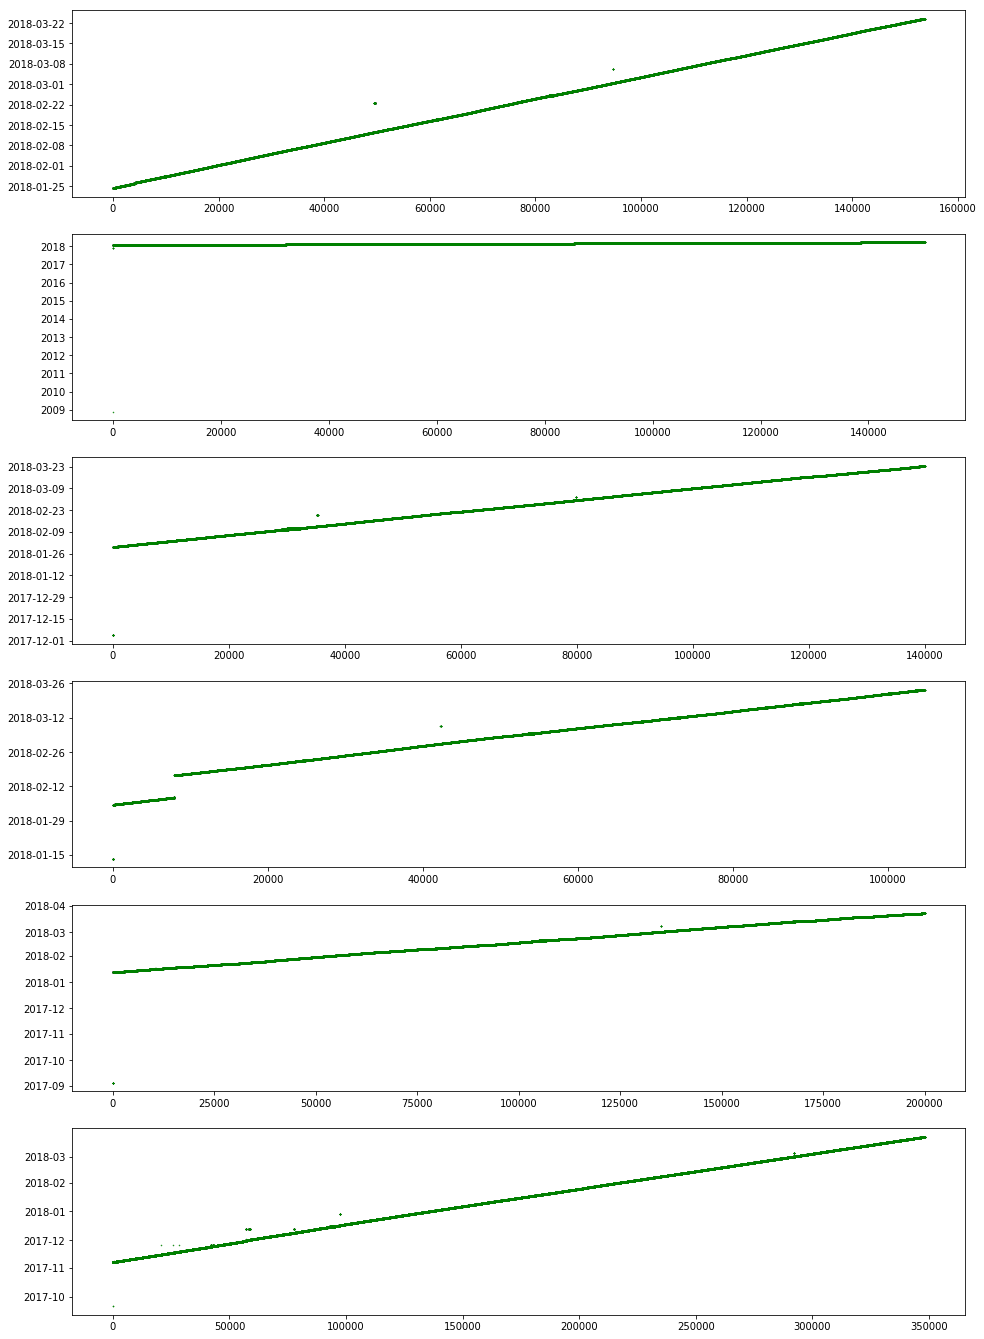

In [6]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, date1, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(df2.index, date2, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, date3, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, date4, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, date5, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, date6, 'g.', markersize = 1, linewidth = 1);



### Assessing 
#### 2. Plotting Fuel voltage vs Datetime

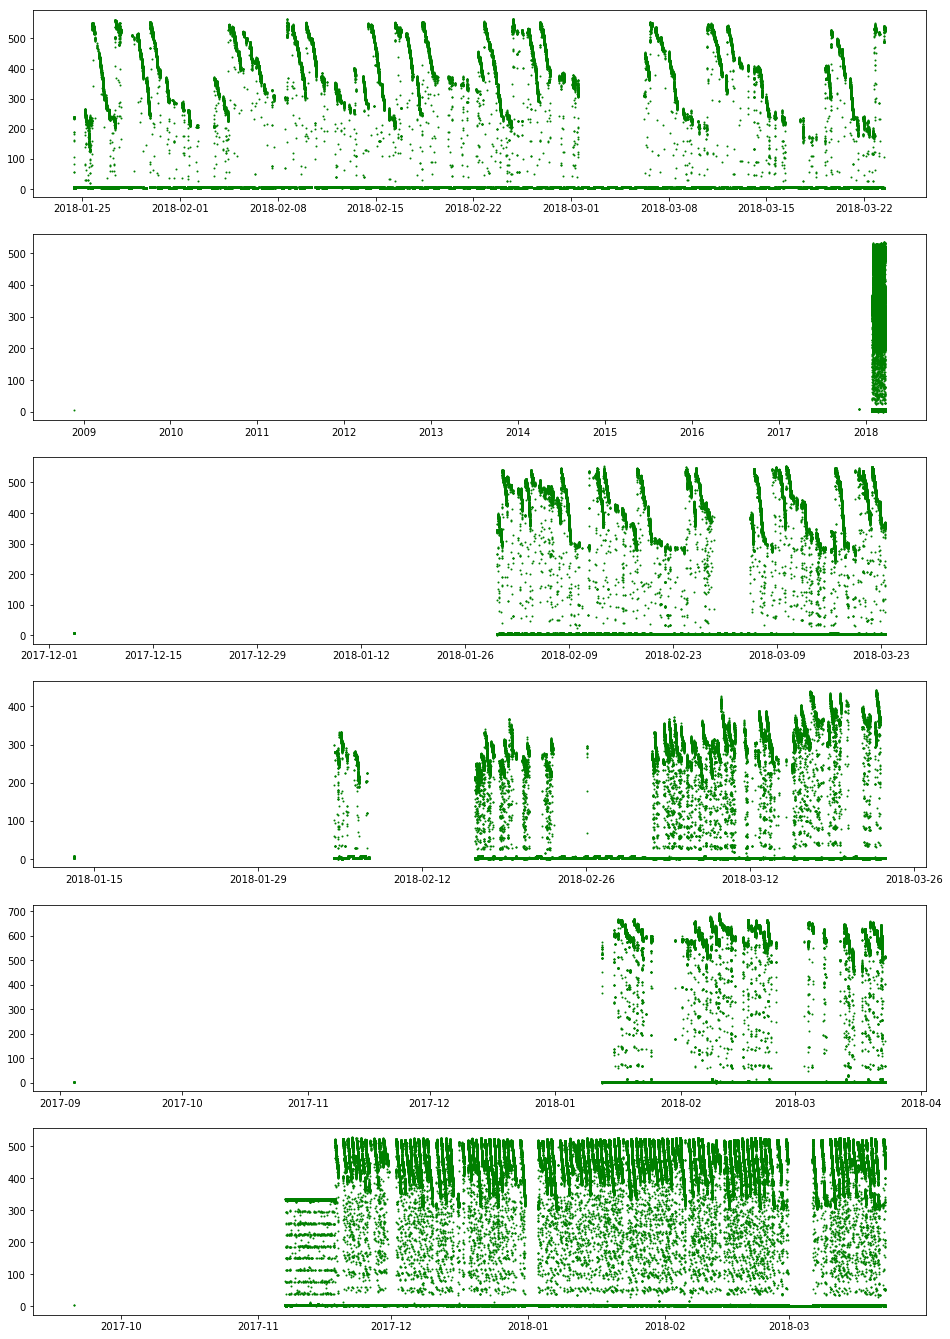

In [7]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(date1, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(date2, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(date3, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(date4, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(date5, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(date6, df6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);



### Assessing 
#### 3. Plotting Cumulative Distance vs time

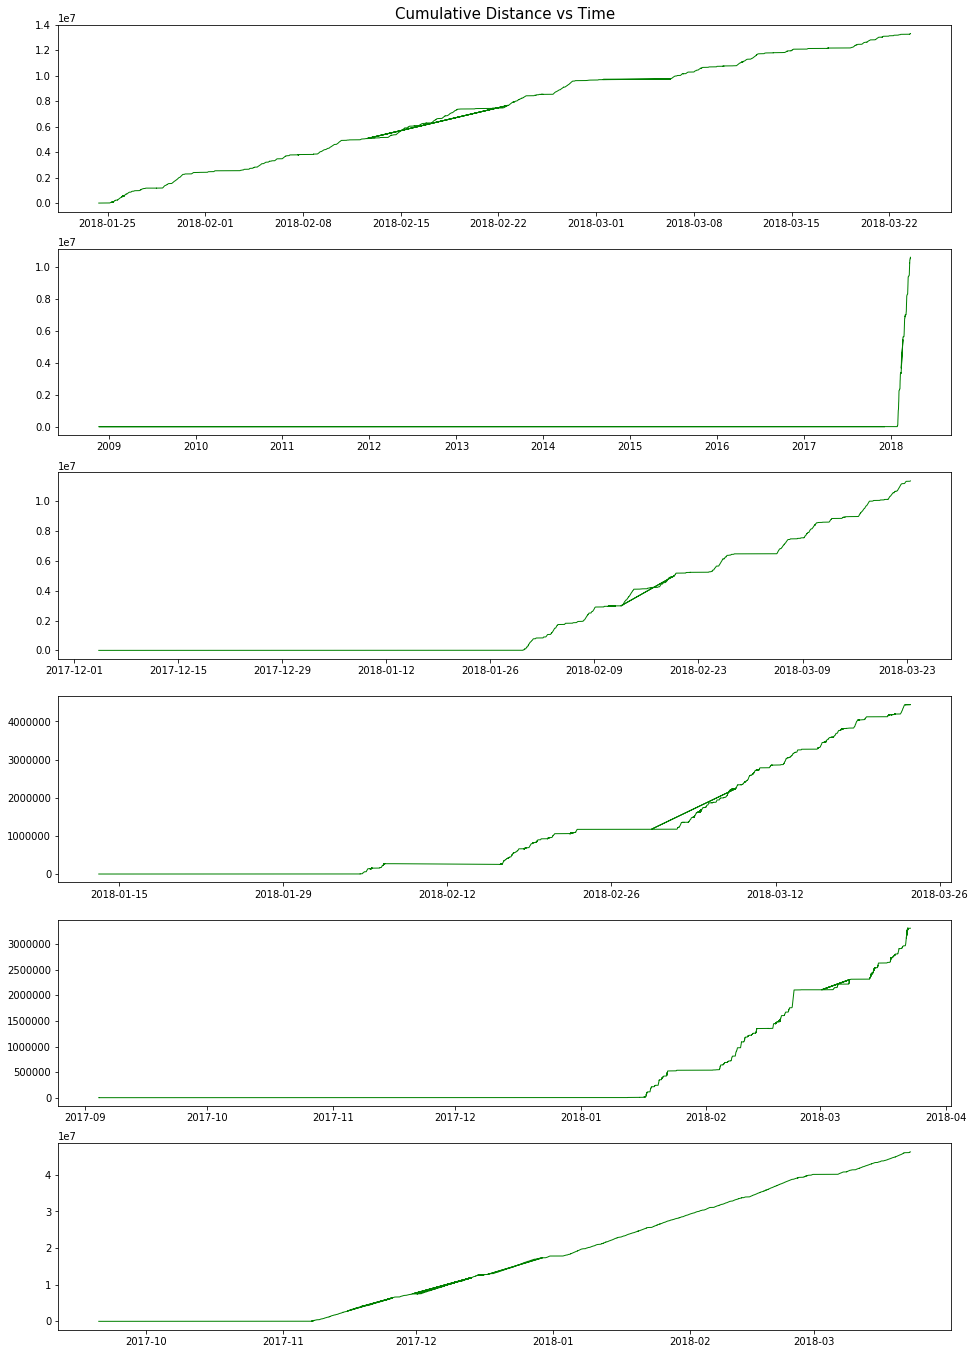

In [8]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(date1, df1.distance, 'g-', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(date2, df2.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(date3, df3.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(date4, df4.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(date5, df5.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(date6, df6.distance, 'g-', markersize = 2, linewidth = 1);


In [9]:
loadData()

### Data Cleaning

#### 1. Setting Datetime datatype for all datasets, depending upon type of date format written

In [10]:


def formatDate():
    global df1,df2,df3,df4,df5,df6 
    df1.datetime = df1.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df2.datetime = df2.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df3.datetime = df3.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df4.datetime = df4.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df5.datetime = df5.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
    df6.datetime = df6.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )

formatDate()



#### 2. Sorting data as per DATETIME

In [11]:
def sortDate():
    global df1,df2,df3,df4,df5,df6 
    df1 = df1.sort_values(['datetime'], ascending= True)
    df2 = df2.sort_values(['datetime'], ascending= True)
    df3 = df3.sort_values(['datetime'], ascending= True)
    df4 = df1.sort_values(['datetime'], ascending= True)
    df5 = df2.sort_values(['datetime'], ascending= True)
    df6 = df3.sort_values(['datetime'], ascending= True)

sortDate()

#### 3. Removing Outliars

In [13]:
def removeOutliar():
    global df1,df2,df3,df4,df5,df6
    
    
    df1 = df1[df1['distance']>=0]
    
    df1 = df1[df1['distance']>=0]
    df1 = df1[df1.fuelVoltage <= 600]

    df2 = df2[df2['distance']>=0]
    df2 = df2[df2.fuelVoltage <= 600]
    
    df3 = df3[df3['distance']>=0]
    df3 = df3[df3.fuelVoltage <= 600]
    
    df4 = df4[df4['distance']>=0]
    df5 = df5[df5.fuelVoltage <= 600]
    
    df5 = df5[df5['distance']>=0]
    df4 = df4[df4.fuelVoltage <= 600]
    
    df6 = df6[df6['distance']>=0]
    df6 = df6[df6.fuelVoltage <= 600]

    
removeOutliar()

#### 4. Resetting Index

In [14]:
def resetIndex():
    global df1,df2,df3,df4,df5,df6
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    df3 = df3.reset_index(drop=True)
    df4 = df4.reset_index(drop=True)
    df5 = df5.reset_index(drop=True)
    df6 = df6.reset_index(drop=True)

    
resetIndex()

In [15]:
d1M = df1.distance.max()
d2M = df2.distance.max()
d3M = df3.distance.max()
d4M = df4.distance.max()
d5M = df5.distance.max()
d6M = df6.distance.max()


#### 5. Normalising Data

In [16]:
def normalData():
    global df1,df2,df3,df4,df5,df6
    
    def norm(df):
        df.distance= df.distance/df.distance.max()
        df.fuelVoltage = df.fuelVoltage/df.fuelVoltage.max()
        return df

    df1 = norm(df1)
    df2 = norm(df2)
    df3 = norm(df3)
    df4 = norm(df4)
    df5 = norm(df5)
    df6 = norm(df6)


normalData()

In [17]:
datetime.datetime(2016,5,1).month

5

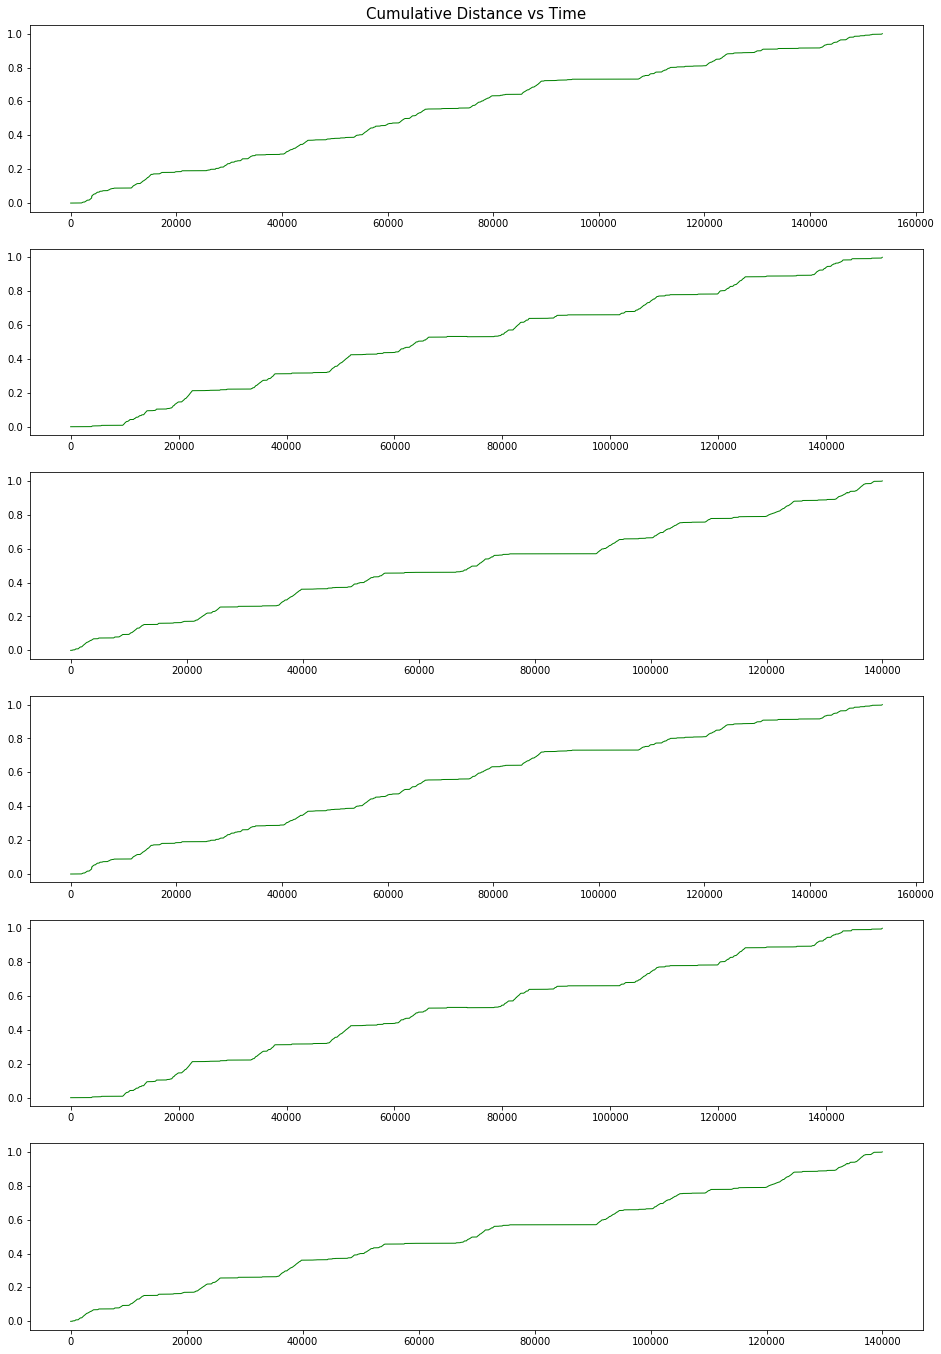

In [18]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.distance, 'g-', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(df2.index, df2.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.distance, 'g-', markersize = 2, linewidth = 1);


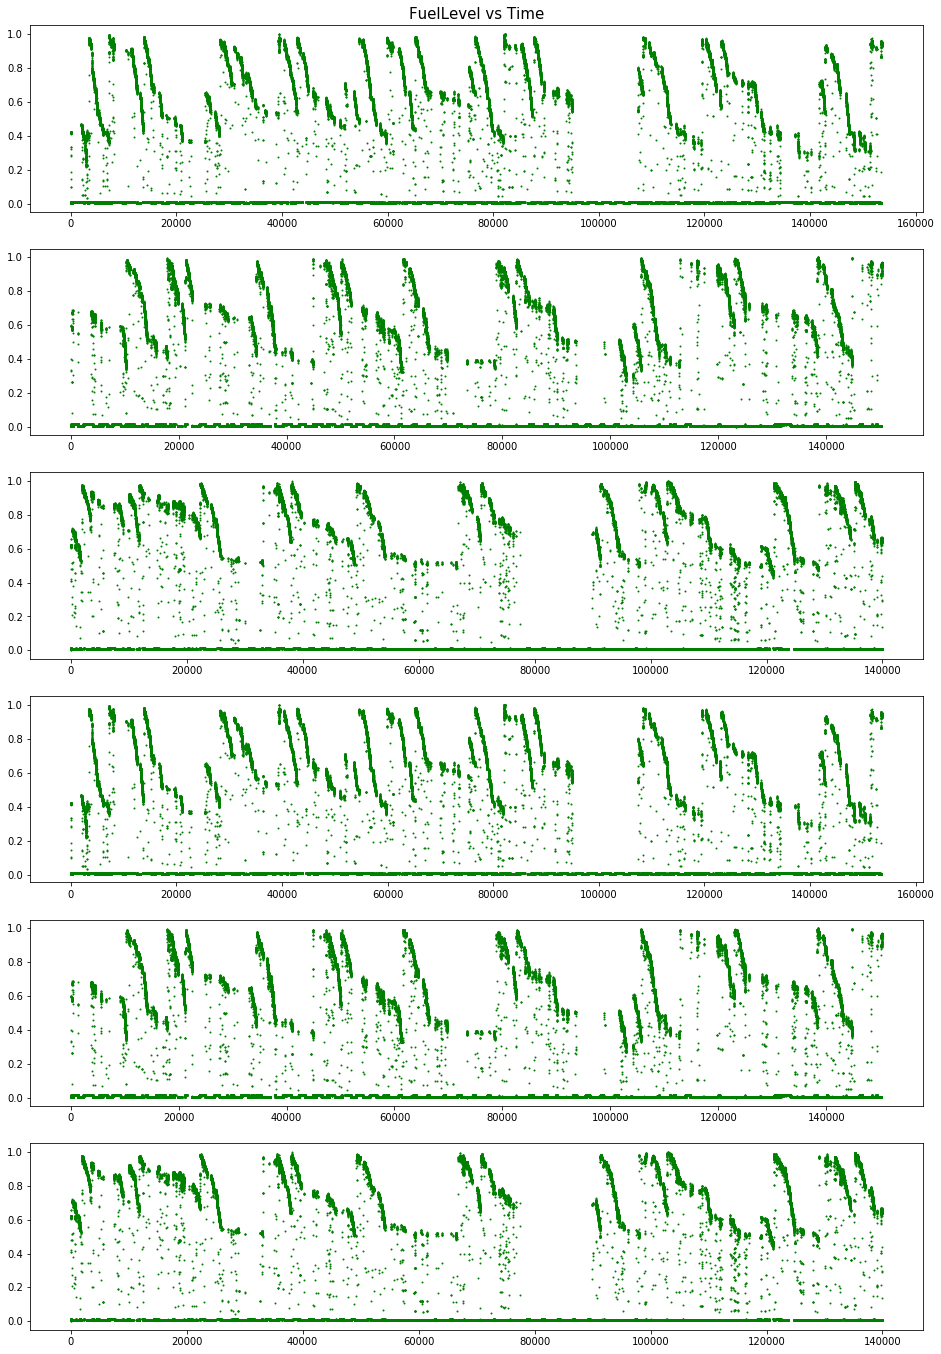

In [22]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.title("FuelLevel vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(df2.index, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.savefig("Conti/Level1.png")


### Removing 'device_state' = OFF rows

In [23]:
df1['dev_state'] = df1['dev_state'].apply(lambda x: int(x))
df2['dev_state'] = df2['dev_state'].apply(lambda x: int(x))
df3['dev_state'] = df3['dev_state'].apply(lambda x: int(x))
df4['dev_state'] = df4['dev_state'].apply(lambda x: int(x))
df5['dev_state'] = df5['dev_state'].apply(lambda x: int(x))
df6['dev_state'] = df6['dev_state'].apply(lambda x: int(x))

       
dff1 = df1[df1['dev_state'] ==1]
dff2 = df2[df2['dev_state'] ==1]
dff3 = df3[df3['dev_state'] ==1]
dff4 = df4[df4['dev_state'] ==1]
dff5 = df5[df5['dev_state'] ==1]
dff6 = df6[df6['dev_state'] ==1]


In [24]:
dff1.head()
dff1 = dff1.reset_index(drop=True)
dff2 = dff2.reset_index(drop=True)
dff3 = dff3.reset_index(drop=True)
dff4 = dff4.reset_index(drop=True)
dff5 = dff5.reset_index(drop=True)
dff6 = dff6.reset_index(drop=True)


### Plotting ON State Data

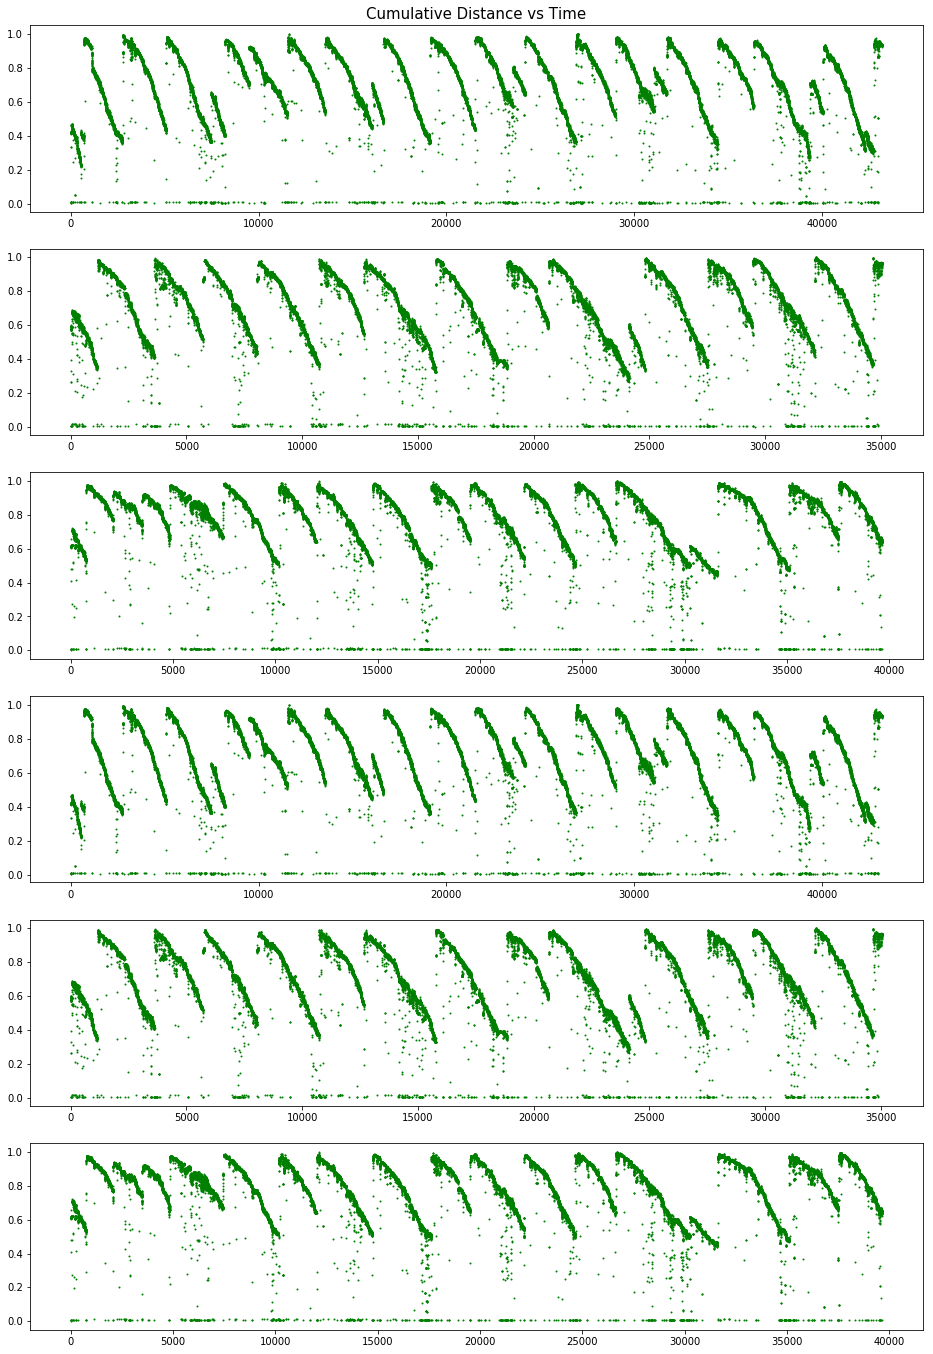

In [25]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(dff2.index, dff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(dff3.index, dff3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(dff4.index, dff4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(dff5.index, dff5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(dff6.index, dff6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Level2.2.png')


### Removing probable errorenous data  and Plotting

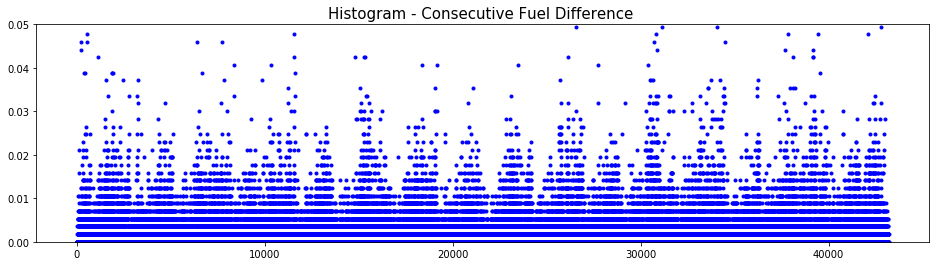

In [26]:
def rem_ErrData(dff, level, f = ''):   
    -
   
    return dff1

df1l6 =rem_ErrData(dff1,6);

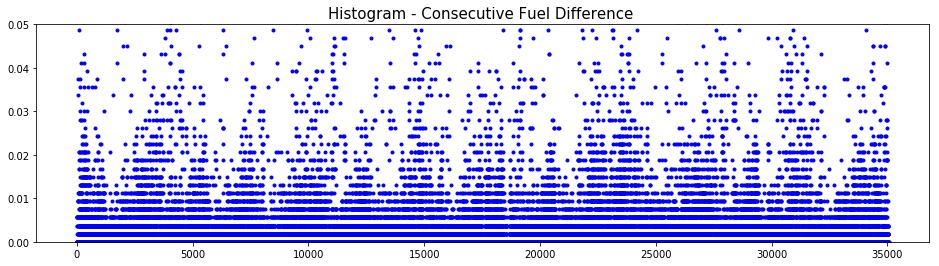

In [27]:
df2l6 = rem_ErrData(dff2,6);

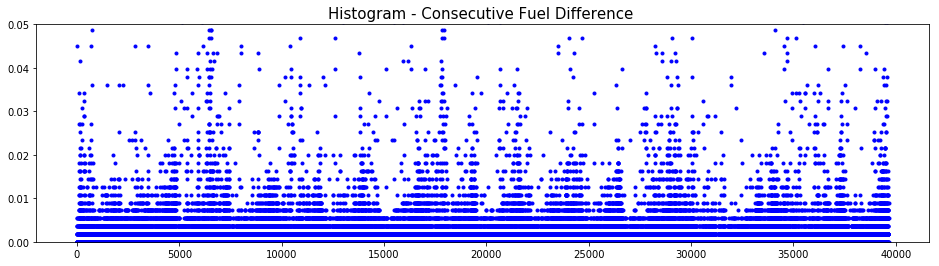

In [28]:
df3l6 = rem_ErrData(dff3,6);

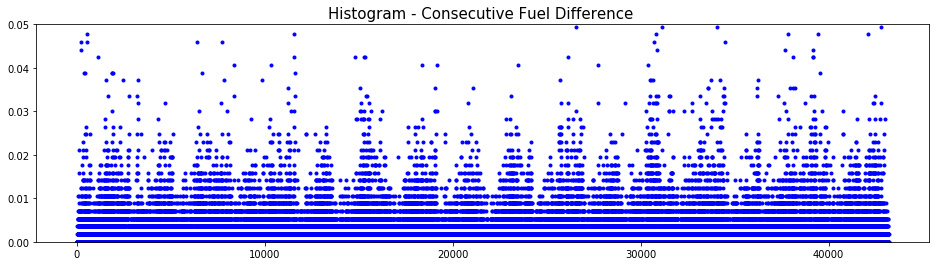

In [29]:
df4l6 = rem_ErrData(dff4,6);


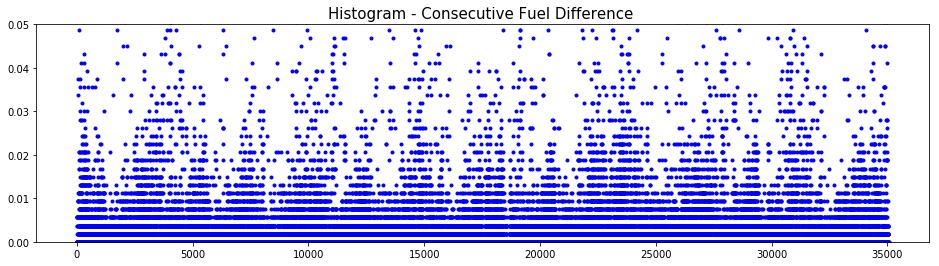

In [30]:
df5l6 = rem_ErrData(dff5,6);

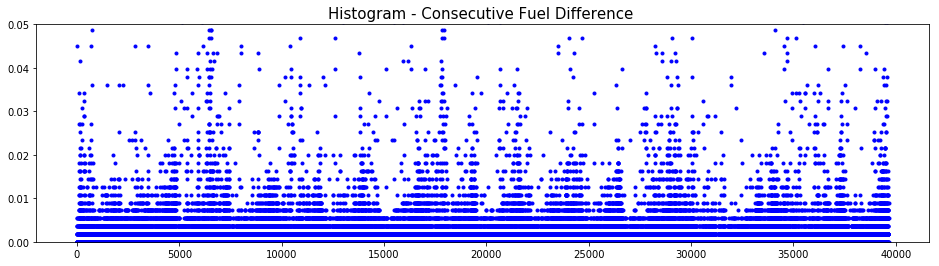

In [31]:
df6l6 = rem_ErrData(dff6,6);

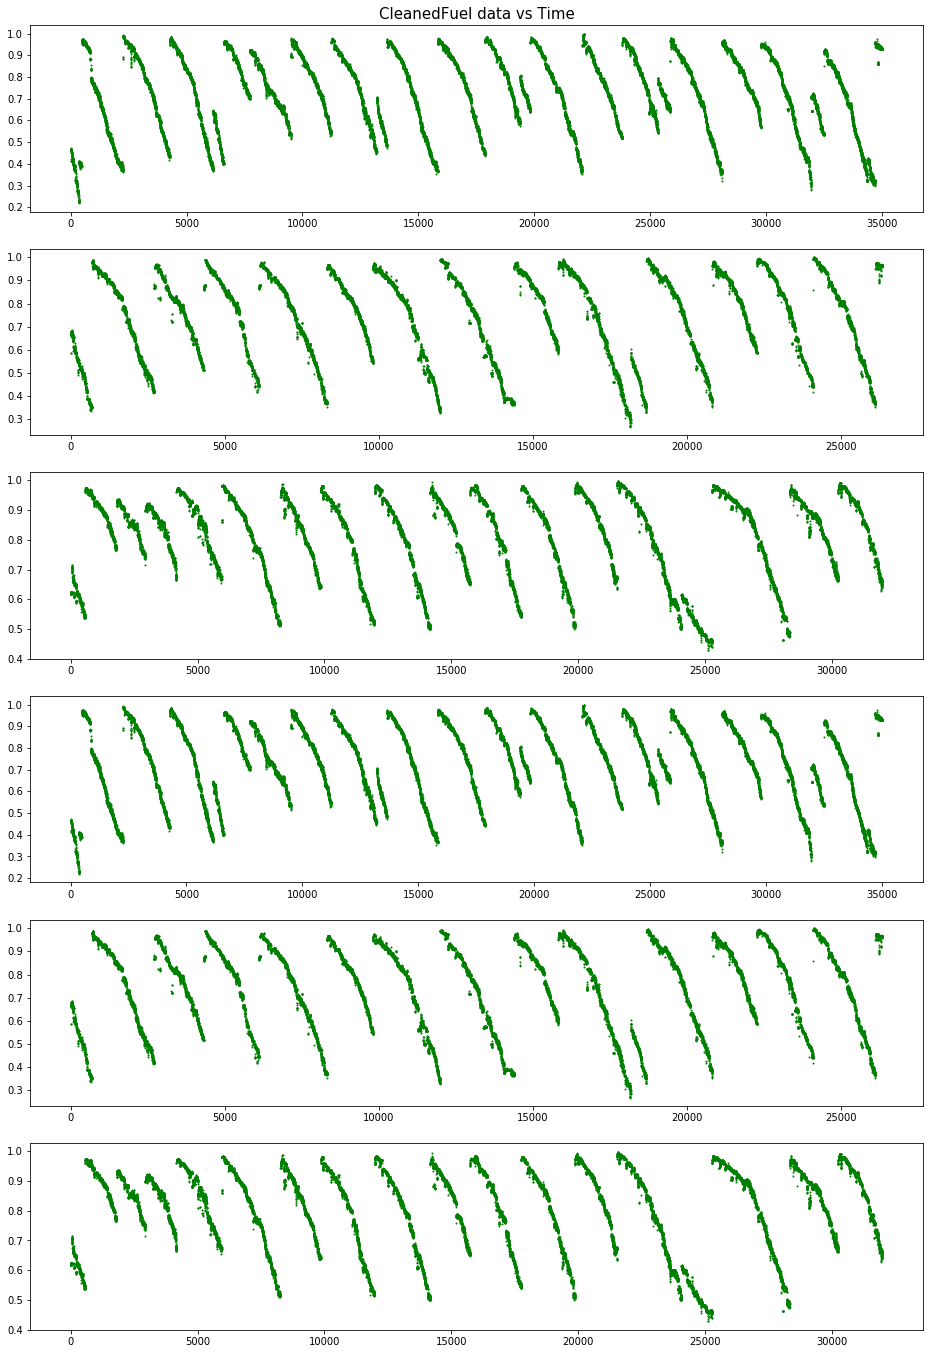

In [80]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.title("CleanedFuel data vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot(df2l6.index, df2l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3l6.index, df3l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4l6.index, df4l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5l6.index, df5l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6l6.index, df6l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Level3.png')

In [32]:
a = pd.Series([2,3,4,5,6])
a1 = a[[1,2]] 
a2 = a[[1,3]]
a1 = a1.reset_index(drop=True)
a2 = a2.reset_index(drop=True)
a1-a2

0    0
1   -1
dtype: int64

In [33]:
df1.distance.max()

1.0

### Identifying probable datajump points

In [34]:
def theft_point(dff, level = 0.05, logic = 1):   
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)
    
    theft_pts = []
    ctr = 0

    from sympy.geometry import Point
    i=0
    dd1 = [0]

    dd2 = [y[1]-y[0]]
    for i in range(1,len(x)):   
        try:
#             d1 =abs(y[i+1] - y[i])
#             d2 =abs(y[i+2] - y[i])
#             d3 =abs(y[i+3] - y[i])
#             d4 =abs(y[i+4] - y[i])
#             d5 =abs(y[i+4] - y[i])
            
            d_forward = abs(y[i+1:i+15] -y[i])
            d_backward = abs(y[i-21:i-1] -y[i])
            #print (d_backward)
        except:
            print ("**")
        #if (d1 >= 0.05) & (d2 >= 0.05)&(d3 >= 0.05)&(d4 >= 0.05)&(d5 >= 0.05)&(d5 >= 0.05):
        if ((sum(d_forward>level) in list(range(15,20))) & (sum(d_forward<0.1) == 19)):
            if (sum(d_backward<level) in list(range(15,21))):
                
                if logic==1: 
                    if (y[i+1] -y[i]) < 0 :
                        theft_pts.append(dff.index[i])
                        ctr +=1
                        
                if logic==0: 
                    if (y[i+1] -y[i]) > 0  :
                        theft_pts.append(dff.index[i])
                        ctr +=1
                        print(theft_pts, ctr)
        
        if (ctr>=2):
            if ((theft_pts[ctr-1] - theft_pts[ctr-2]) in list(range(1,6))) :
                theft_pts.pop(ctr-2)
                ctr -=1
        #print (i)

   # dd1.append(0)
   # dd2.append(0)    
    #dff['dd1'] = pd.Series(dd1)
    #dff['dd2'] = pd.Series(dd2)
    return theft_pts
    

In [35]:
def theft_point2(dff, level = 0.05, logic = -1):   
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)
    
    theft_pts = []
    ctr = 0

    from sympy.geometry import Point
    i=0
    dd1 = [0]

    dd2 = [y[1]-y[0]]
    for i in range(1,len(x)):   
        try:
#             d1 =abs(y[i+1] - y[i])
#             d2 =abs(y[i+2] - y[i])
#             d3 =abs(y[i+3] - y[i])
#             d4 =abs(y[i+4] - y[i])
#             d5 =abs(y[i+4] - y[i])
            
            d_forward = (y[i+1:i+15] -y[i])
            d_backward = (y[i+1] - y[i-15:i])
            #print (d_backward)
        except:
            print ("**")
        #dd1.append(d1)
        #dd2.append(d2)
        #if (d1 >= 0.05) & (d2 >= 0.05)&(d3 >= 0.05)&(d4 >= 0.05)&(d5 >= 0.05)&(d5 >= 0.05):
        if ((sum(d_forward < -1*level) in list(range(14,16)))):# & (sum(d_forward<0.1) == 19)):
            if (sum(d_backward < -1*level) in list(range(14,16))):
                
                theft_pts.append(dff.index[i])
                ctr +=1
                #print(theft_pts, ctr)
        
        if (ctr>=2):
            if ((theft_pts[ctr-1] - theft_pts[ctr-2]) in list(range(1,6))) :
                theft_pts.pop(ctr-2)
                ctr -=1
        #print (i)

   # dd1.append(0)
   # dd2.append(0)    
    #dff['dd1'] = pd.Series(dd1)
    #dff['dd2'] = pd.Series(dd2)
    print (len(theft_pts))
    return theft_pts
    

In [36]:
a = pd.Series([2,3,4,5])
2-a

0    0
1   -1
2   -2
3   -3
dtype: int64

In [37]:
theftpts1 = theft_point2(df1l6, level=0.02);
#dfl4.to_csv("Test.csv");


**
21


In [38]:
len(df1l6.datetime[theftpts1])

21

In [39]:
for i in range(len(theftpts)):
    jump = df1l4.loc[theftpts(i),'fuelVoltage'] - df1l4.loc[theftpts(i)+1,'fuelVoltage']
    td = 
df1l4.datetime[theftpts]

SyntaxError: invalid syntax (<ipython-input-39-0fccf9cb896d>, line 3)

### Plotting Cleaned Data with Cumulative Distance (Normalised)

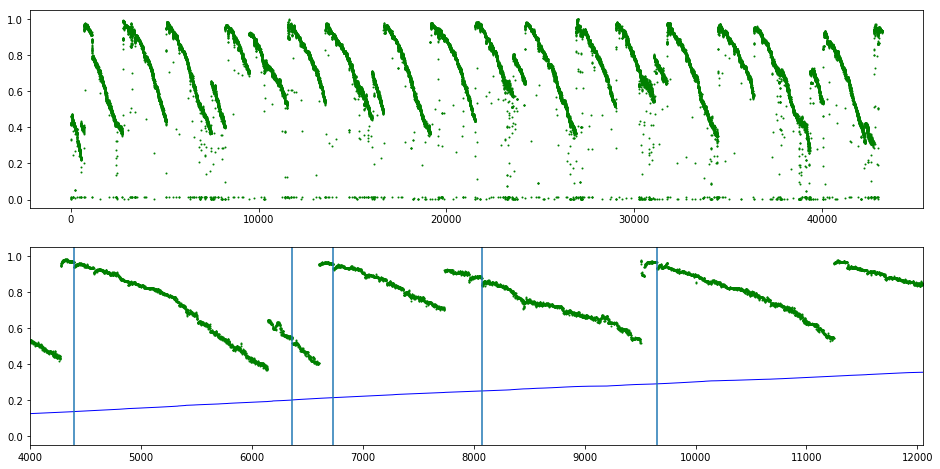

In [47]:
plt.rcParams['figure.figsize'] = [16,8]
plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(2,1,2)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.plot(df1l6.index, df1l6.distance, 'b-', markersize = 2, linewidth = 1);
plt.xlim(4000,12050)
for pt in theftpts1:
    plt.axvline(pt)

In [52]:
theftpts2 = theft_point2(df2l6[:], level = 0.02);

**
23


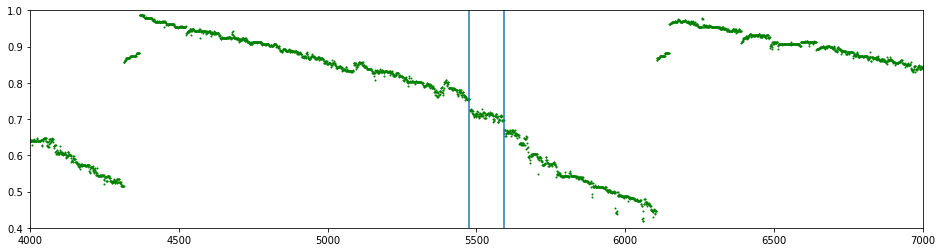

In [53]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df2l6.index, df2l6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.plot(df2l6.index, df2l6.distance, 'b-', markersize = 2, linewidth = 1);
plt.xlim(4000,7000)
plt.ylim(0.4,1)
for pt in theftpts2:
    plt.axvline(pt)

In [56]:
theftpts3 = theft_point2(df3l6[:], 0.01);

**
107


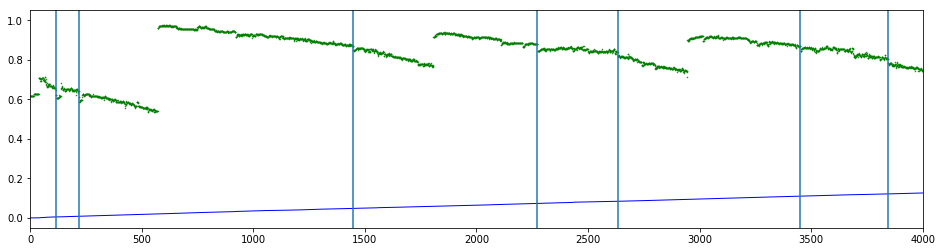

In [57]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df3l6.index, df3l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df3l6.index, df3l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(0,4000)
for pt in theftpts3:
    plt.axvline(pt)

In [58]:
theftpts4 = theft_point2(df4l6[:], 0.02);

**
21


In [67]:
theftpts5 = theft_point2(df5l6[:], 0.01);

**
75


In [68]:
theftpts6 = theft_point2(df6l6[:], 0.01);

**
107


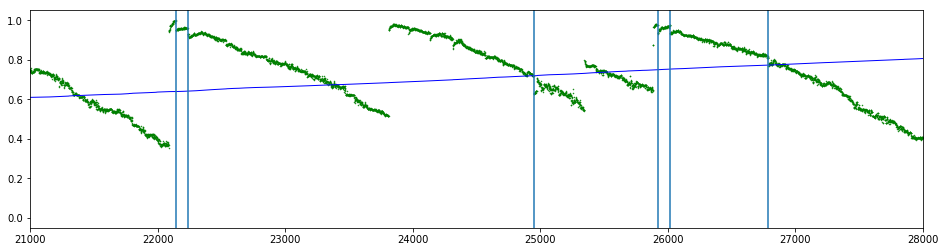

In [69]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df4l6.index, df4l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df4l6.index, df4l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(21000,28000)
for pt in theftpts4:
    plt.axvline(pt)

In [70]:
result_df1= pd.DataFrame()
result_df1['theft_index'] = [df1l6.index[i] for i in theftpts1]
result_df1['theft_time'] = [df1l6.datetime[i] for i in theftpts1]
result_df1['fuel_jump'] = [(df1l6.fuelVoltage[i] - df1l6.fuelVoltage[i+1])*500 for i in theftpts1]
result_df1['dist_jump(KM)'] = [(df1l6.distance[i+1] - df1l6.distance[i])*(.001)*d1M for i in theftpts1]
result_df1['time_jump'] = [(df1l6.datetime[i+1] - df1l6.datetime[i]) for i in theftpts1]

result_df1

,theft_index,theft_time,fuel_jump,dist_jump(KM),time_jump
0,847,2018-01-25 20:42:13,18.551237,2.729,00:35:32
1,857,2018-01-25 21:23:46,14.134276,115.195,03:26:29
2,865,2018-01-26 01:32:23,22.968198,22.301,02:19:18
3,4396,2018-01-29 21:10:31,14.134276,5.576,00:27:23
4,6364,2018-02-03 18:25:27,16.784452,9.206,08:39:11
5,6733,2018-02-04 12:20:06,14.134276,2.045,00:28:57
6,8072,2018-02-05 18:07:36,22.968198,0.803,04:59:40
7,9649,2018-02-08 18:02:50,17.667845,1.977,06:13:22
8,12926,2018-02-12 04:21:44,21.201413,1.674,01:38:20
9,22142,2018-02-24 20:31:47,25.618375,2.511,00:40:08


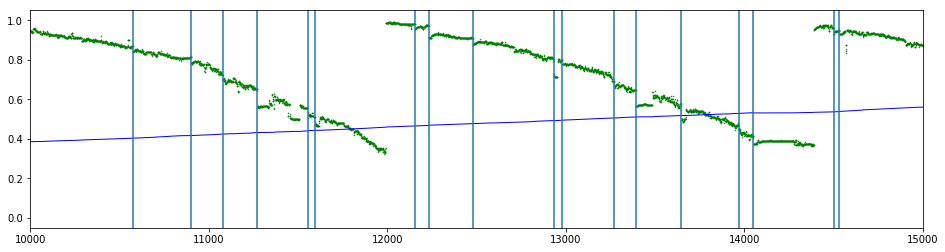

In [72]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df5l6.index, df5l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df5l6.index, df5l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(10000,15000)
for pt in theftpts5:
    plt.axvline(pt)

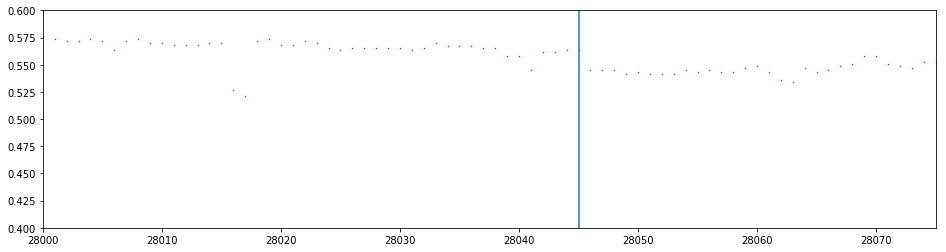

In [78]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df6l6.index, df6l6.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(df6l6.index, df6l6.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(28000,28075)
plt.ylim(0.4,0.6)
for pt in theftpts6:
    plt.axvline(pt)

### Predicting Missing Values 
##### Predicting missing data in the final cleaned data when compared to initial fuel dataset 

In [ ]:

def predit_MissingData(df_old, df_cleaned):
    j=0
    predict_Data = []
    lastdata_value = 0
    i=0
    lastdata_value =  df_old.loc[0,'fuelVoltage']
    
    while i <(len(df_old)):
        
        if j< len(df_cleaned):
            
            if (df_cleaned.loc[j,'datetime'] > df_old.loc[i,'datetime']):
                predict_Data.append(lastdata_value)
                #print ('i = ',i)

            elif (df_cleaned.loc[j,'datetime']== df_old.loc[i,'datetime']):
                lastdata_value =  df_old.loc[i,'fuelVoltage']
                j+=1
                predict_Data.append(lastdata_value)
                #print ('*j = ',j)
        
        else:
            predict_Data.append(df_old.loc[i,'fuelVoltage'])
            #print (i)
            
        i+=1
    
    return predict_Data



predict_Data = predit_MissingData(dff1, df1l6)  
         
        
        

In [ ]:
len(predict_Data), len(dff1), len(df1l6)

### Final Plot
Plotting Original Data, CLeaned Data, Cleaned Data with Prediction,  CLeaned Data (Excluding Zero and Static Zone)

In [ ]:
plt.rcParams['figure.figsize'] = [16,16]

plt.subplot(4,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
#plt.xlim(0,3200)
plt.ylim(0,1.1)

plt.subplot(4,1,2)
plt.plot(df1l6.datetime, df1l6.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
plt.ylim(0,1.1)

plt.subplot(4,1,3)
plt.plot(dff1.datetime, predict_Data, 'g.', markersize = 3, linewidth = 1);
plt.plot(df1l6.datetime, df1l6.distance, 'b-', markersize = 1, linewidth = 1);


plt.subplot(4,1,4)
plt.plot(df1l6.index, df1l6.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
plt.plot(df1l6.index, df1l6.distance, 'b-', markersize = 1, linewidth = 1);
#plt.xlim(0,3200)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.1.png')


In [ ]:
plt.rcParams['figure.figsize'] = [16,12]

plt.subplot(3,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

plt.subplot(3,1,2)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(7000,11000)
#plt.ylim(0.6,1.1)

plt.subplot(3,1,3)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(0, 4000)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.3.png')

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(11000, 15000)
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(4800, 7500)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.4.png')

In [ ]:
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(15000, 20000)
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.dd1, 'b-', markersize = 1, linewidth = 1);
plt.xlim(7500, 10000)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.5.png')

In [ ]:
plt.rcParams['figure.figsize'] = [16,16]
plt.subplot(4,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,8000)
#plt.ylim(0.6,1.1)

plt.subplot(4,1,2)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,3500)
#plt.ylim(0.6,1.1)

plt.subplot(4,1,3)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,1800)

In [ ]:
dfff1.head()

In [ ]:
dff1.to_csv("Conti/datafinal_v1_3.csv")
dfff1.to_csv("Conti/datafinal_v1_3.2.csv")
# dff2.to_csv("data/datafinal_v1_2.csv")
# dff3.to_csv("data/datafinal_v1_3.csv")
# dff4.to_csv("data/datafinal_v1_4.csv")
# dff5.to_csv("data/datafinal_v1_5.csv")
# dff6.to_csv("data/datafinal_v1_6.csv")